                                                Final Project CSC478
                                                     Ryan Hossa
                                            Predicting Video Game Success

<b> Overall goal:</b> Our goal is to look at video game sales depending on public/critic ratings, genre, plaform, maker, and age ratings to determine how well the game will sell. We will be going through several supervised models and an unsupervised KernelPCA to understand not only our contributions to max variability but what are best predictors under our best model. From millions of dollars in annual sales less than 50 years ago to over a 100 billion in the US alone so far in 2020. The industry has blossomed and expanded, but has that expansion all been good? Several companies have installed individuals who joined the industry for margins and profits and others have opened to public sales of company shares. Similar to films studios followign a trend of movies mimicing a style the video game industry has adopt the same behavior. The industry is transforming and with it so has the products, from beloved works of art inspiring fandom for years to poor quality and reused assets. we have seen series pulling in billions become poor performers overnight. Let's dive in to see what features are driving sales in a broad sense. 

Video:https://youtu.be/NJq8eychepY

<b>Packages Used</b>

In [4]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [15]:
conda install -c conda-forge tabulate

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ryanh\anaconda3

  added / updated specs:
    - tabulate


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tabulate-0.8.7             |     pyh9f0ad1d_0          24 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          24 KB

The following NEW packages will be INSTALLED:

  tabulate           conda-forge/noarch::tabulate-0.8.7-pyh9f0ad1d_0




tabulate-0.8.7       | 24 KB     |            |   0% 
tabulate-0.8.7       | 24 KB     | ######5    |  65% 
tabulate-0.8.7       | 24 KB     | ########## | 100% 
tabulate-0.8.7       | 24 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

C:\Users\ryanh>set "KERAS_BACKE

The system cannot find the file specified.
The system cannot find the path specified.
The system cannot find the path specified.


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from math import pi
from datetime import datetime
from pandas import Series
from math import ceil

#Classifier
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix 
import sklearn.metrics as metrics 
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline

In [6]:
from IPython.core.pylabtools import figsize
figsize(15, 12)

<b> Exploration Data Analysis/Preprocessing</b> 

General Observations: The earlier generation game data may skew results. We see a major uptick in the production and earnings of games. Universally ratings from both critics and users became revelant around the early 2000s meaning the first 1/2 of our data in terms of time is subject to a lot of missing values. Data for 2016 is really poor as it didn't go far into 2016, additionally early consoles or immature as they haven't passed their lifetime showed less game data than expected. There are 16448 rows and 16 attributes. 

In [7]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [8]:
dataAlt = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", encoding="utf-8") #This isn't a mistake this is for other graphical builds
#where we do not redefine the column names 
#Encoding here doesn't matter I did it in part to distiguish the data sets just adding unicoding here

In [10]:
#Let's look at missing data and data in general and change names from sales to nation
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2018 - data["Year"]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448,16448.000000,16448,16416,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,9840,7463.000000,9907,9769,16448.000000
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922,NaN
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,NaN,163.015141,NaN,NaN,11.511004
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.877470
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,NaN,4.000000,NaN,NaN,-2.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,NaN,10.000000,NaN,NaN,8.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,NaN,24.000000,NaN,NaN,11.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,NaN,81.000000,NaN,NaN,15.000000


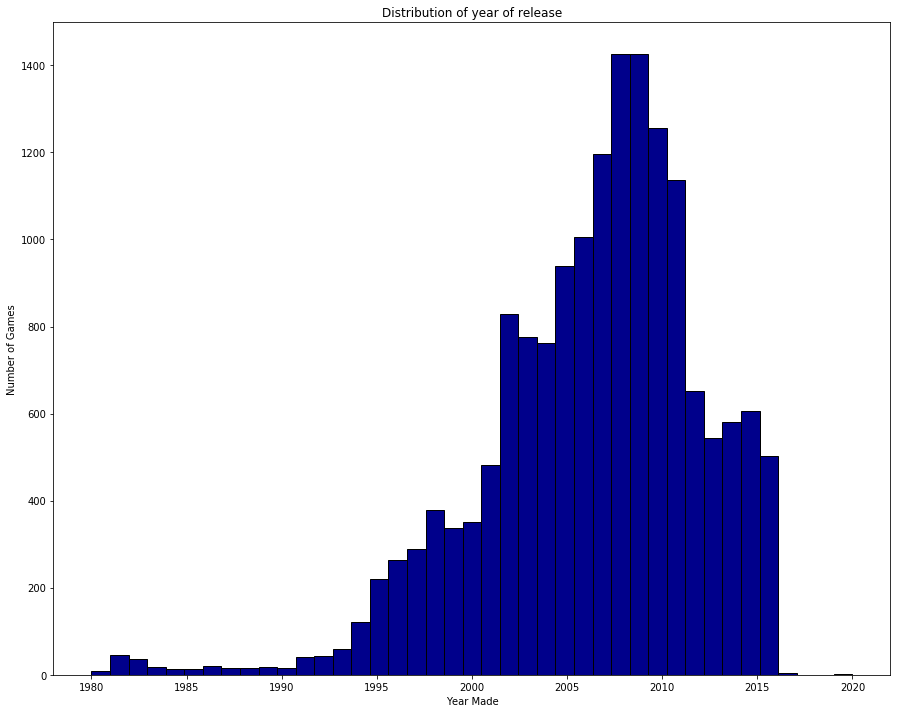

In [11]:
#Let's look at games by release per my point that from a perspective of gaming companies many have joined or been bought out.
#Please note this data ends at early 2016 hence why there is low to no data past then
num_years = data["Year"].max() - data["Year"].min() + 1
plt.hist(data["Year"], bins=num_years, color="darkblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year Made")
plt.ylabel("Number of Games");

C:\Users\ryanh\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


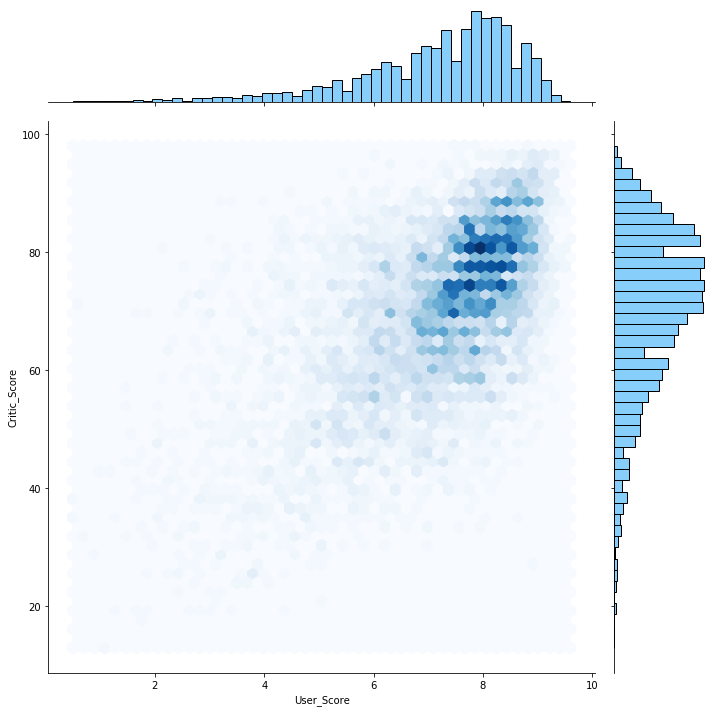

In [12]:
#How does user score compare to critic score
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)

g = sns.jointplot(x="User_Score", y="Critic_Score", data=data, cmap="Blues", kind="hex", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}}, 
                  annot_kws={"loc": 4, "fontsize": 18});
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False);

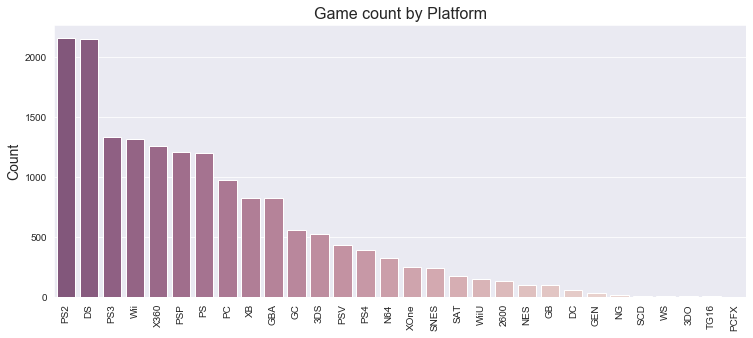

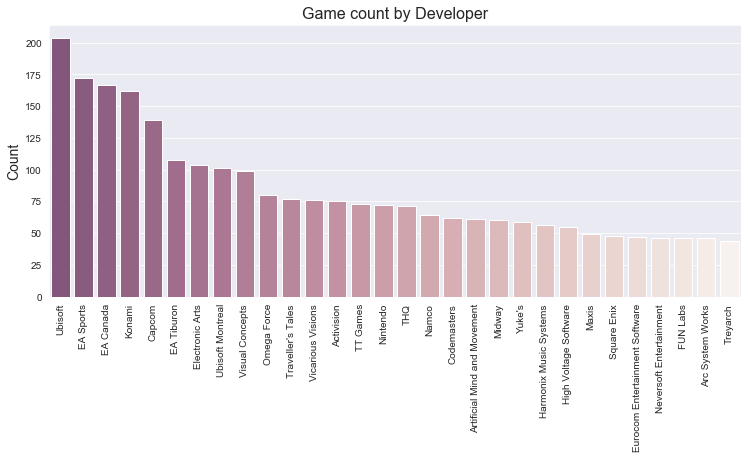

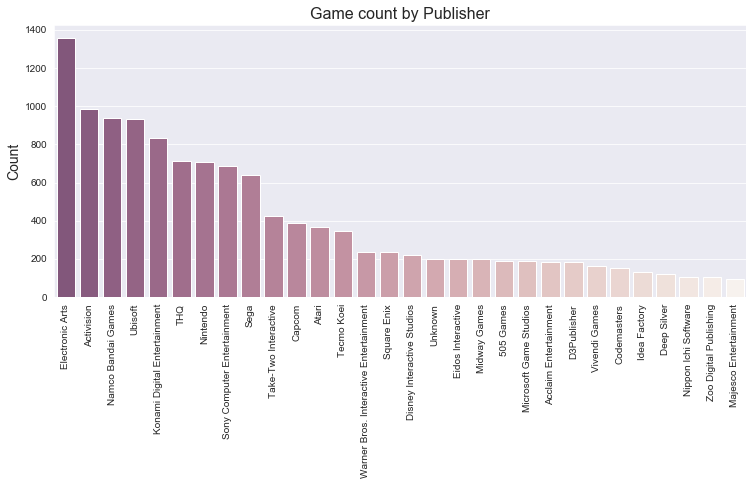

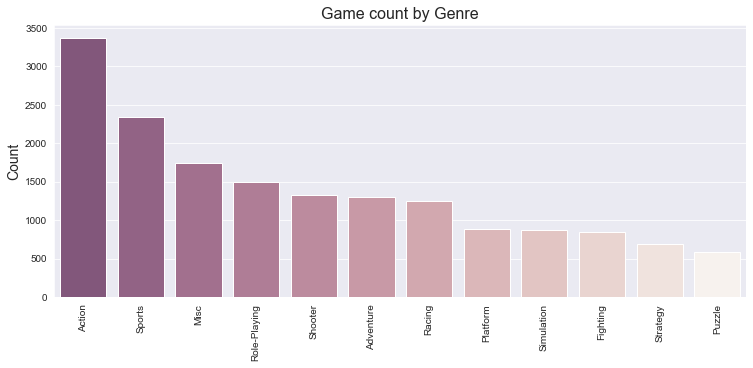

In [13]:
cols = ['Platform', 'Developer', 'Publisher', 'Genre']

for col in cols:#setting parameters for colors in the graphics for the cols
    chart = dataAlt[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("darkgrid")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.4, light=.95, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')


In [14]:
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [15]:
dataAlt2 = dataAlt.dropna(subset=['Critic_Score']).reset_index(drop=True)
dataAlt2['Score_Group'] = dataAlt2['Critic_Score'].apply(lambda x: score_group(x))

In [16]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9

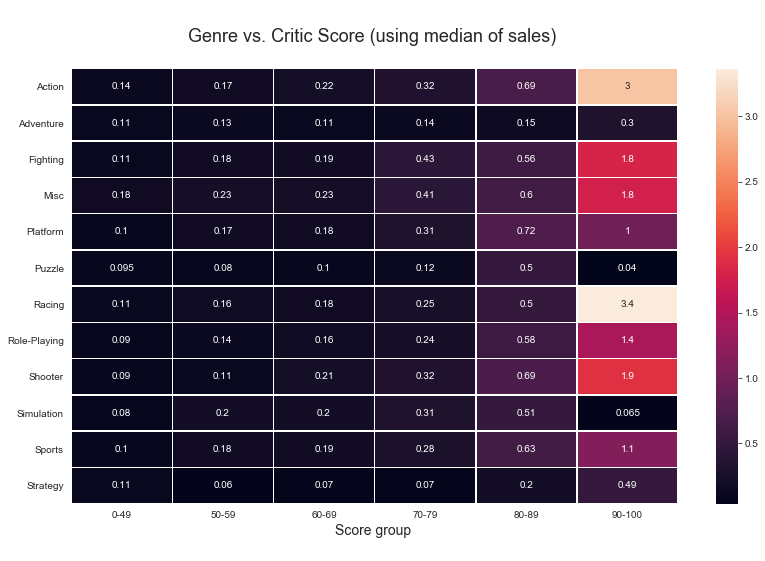

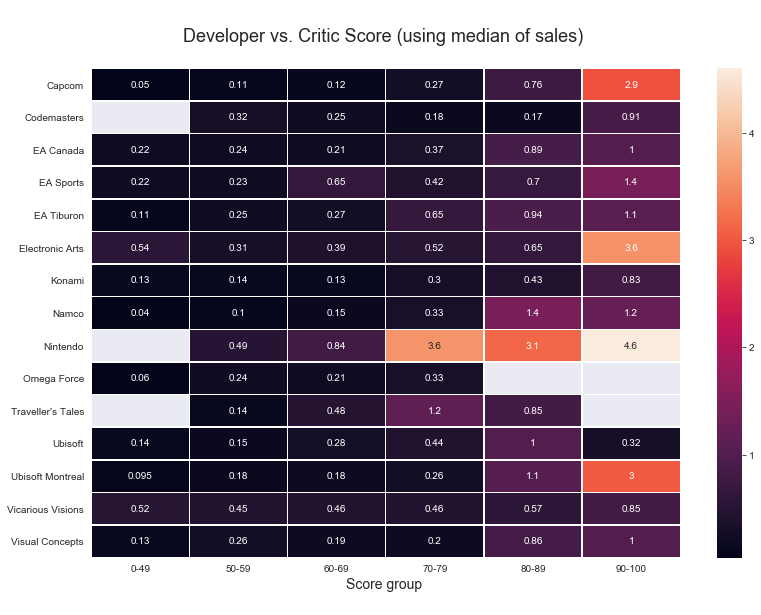

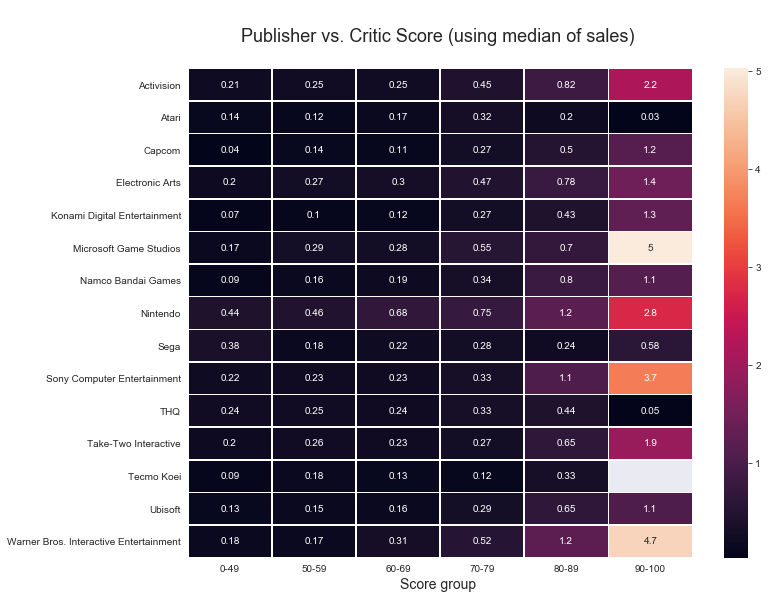

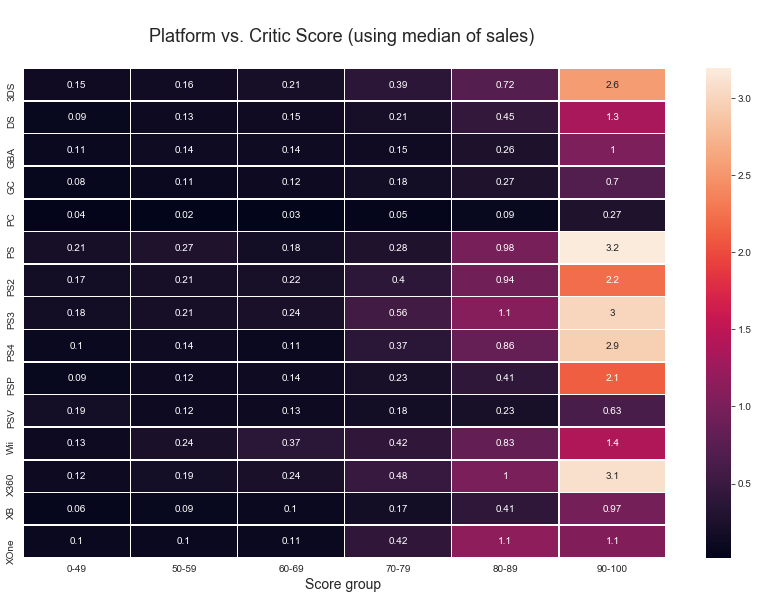

In [17]:
cols = ['Genre', 'Developer', 'Publisher', 'Platform']
for col in cols:
    pack = []
    top = dataAlt2[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    dataAlt2[col] = dataAlt2[col].apply(lambda x: in_top(x))
    dA2_platform = dataAlt2[[col, 'Score_Group', 'Global_Sales']].groupby([col, 'Score_Group']).median().reset_index().pivot(col, "Score_Group", "Global_Sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(dA2_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. Critic Score (using median of sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=18)
    plt.xlabel('Score group \n', fontsize=14)
    pack = []

In [18]:
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = dataAlt2[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        dataAlt2.loc[dataAlt2[col] == k, col] = v

In [19]:
dataAlt2 = dataAlt2[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dataAlt2 = dataAlt2.dropna().reset_index(drop=True)
dataAlt2 = dataAlt2.astype('float64')

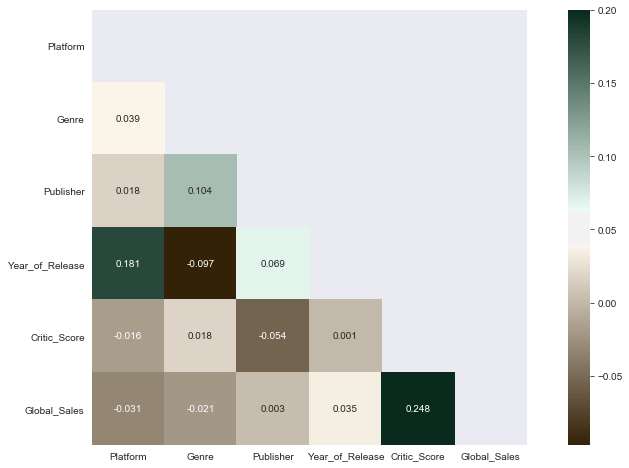

In [20]:
mask = np.zeros_like(dataAlt2.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(770, 150, sep=20, as_cmap=True, s=85, l=15, n=20) # note: 680, 350/470
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(dataAlt2.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap=cmap)

[(0, 4), (50, 95)]

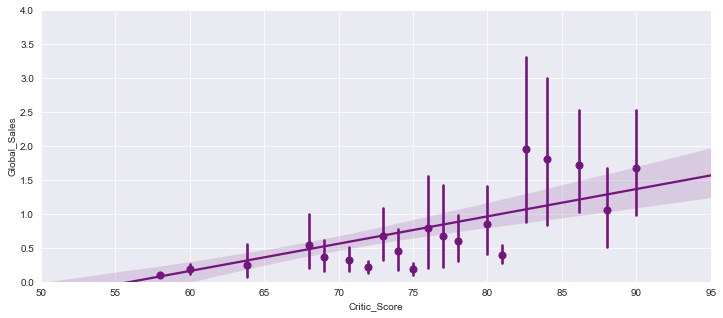

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=dataAlt2.loc[dataAlt2.Year_of_Release >= 2015],
            truncate=True, x_bins=20, color="#73157c").set(ylim=(0, 4), xlim=(50, 95))
#Cutting 2016 due to volume

In [22]:
dgraph = dataAlt[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dgraph = dgraph.dropna().reset_index(drop=True)
dgraph1 = dgraph[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dgraph1['Hit'] = dgraph1['Global_Sales']
dgraph1.drop('Global_Sales', axis=1, inplace=True)

In [23]:
#Let's define success at 5 million in sales because that's what it takes to just be in top 5-10 for a given month
def sales_win(sales):
    if sales >= 5:
        return 1
    else:
        return 0

dgraph1['Hit'] = dgraph1['Hit'].apply(lambda x: sales_win(x))

C:\Users\ryanh\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\ryanh\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


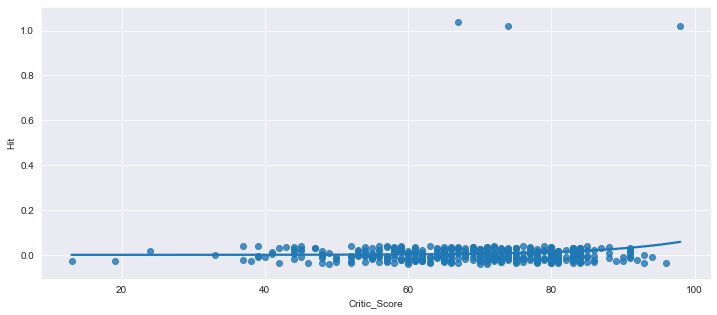

In [28]:
n = ceil(0.05 * len(dgraph1['Hit']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Hit", data=dgraph1.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04)

<b> As you can see it takes a lot to hit to a good sales number even at times critic score can't get you there alone. And  </b>

<b> Let's talk about the elephant in the room the missing values </b>

In [24]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [25]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
User_Score,8985,54.6
User_Count,8985,54.6
Critic_Score,8465,51.5
Critic_Count,8465,51.5
Rating,6679,40.6
Developer,6541,39.8
Publisher,32,0.2


In [26]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [27]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,7286.000000,7286.000000,6747.000000,6747.000000,15401.000000
mean,2006.592624,0.144688,0.072628,0.047301,0.024357,0.289258,67.779028,24.518117,7.079976,111.325033,11.407376
std,5.758078,0.210709,0.131408,0.130786,0.050152,0.346918,13.612120,17.194878,1.511031,406.635191,5.758078
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,-2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,6.300000,9.000000,8.000000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.150000,70.000000,20.000000,7.400000,21.000000,11.000000
75%,2010.000000,0.190000,0.080000,0.030000,0.030000,0.380000,78.000000,34.000000,8.200000,61.000000,15.000000
max,2020.000000,1.670000,1.580000,1.650000,1.180000,1.690000,98.000000,106.000000,9.700000,10665.000000,38.000000


In [28]:
data["Has_Score"] = data["User_Score"].notnull() & data["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

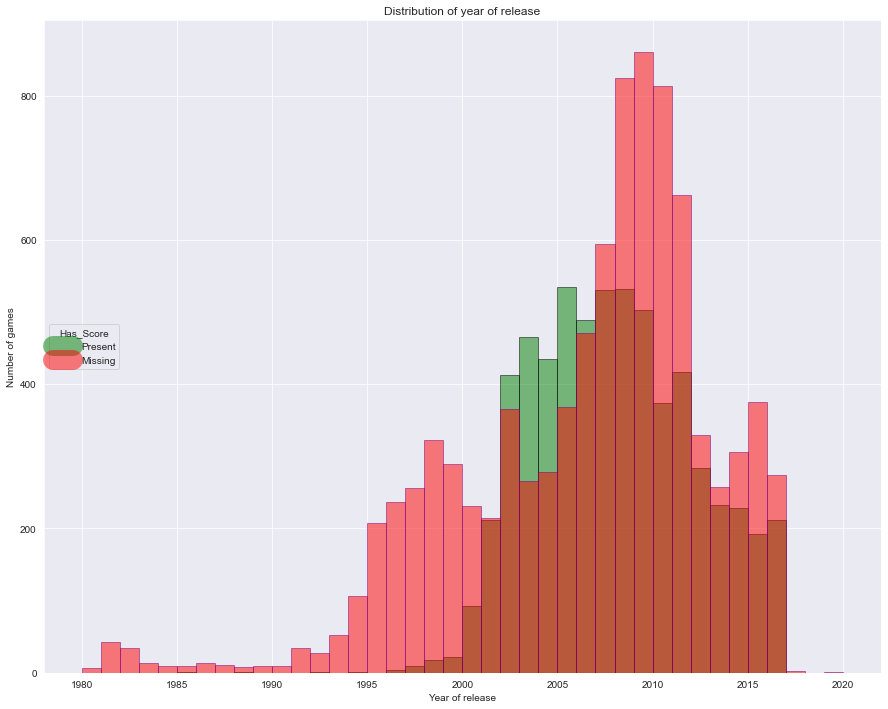

In [29]:
from matplotlib.lines import Line2D
plt.hist(data[data["Has_Score"]==True]["Year"], color="green", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Year"], color="red", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="purple")
plt.title("Distribution of year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="green", lw=20, label="Present", alpha=0.5),
                    Line2D([0], [0], color="red", lw=20, label="Missing", alpha=0.5)],
           title="Has_Score", loc=6);

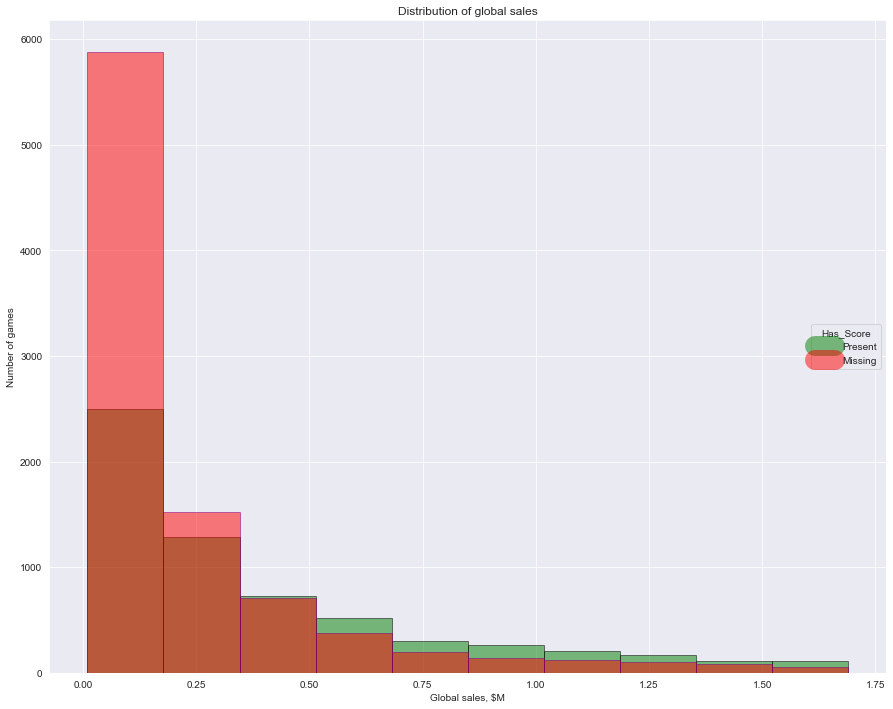

In [30]:
plt.hist(data[data["Has_Score"]==True]["Global"], color="green", alpha=0.5, 
         edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Global"], color="red", alpha=0.5, 
         edgecolor="purple")
plt.title("Distribution of global sales")
plt.xlabel("Global sales, $M")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="green", lw=20, label="Present", alpha=0.5),
                    Line2D([0], [0], color="red", lw=20, label="Missing", alpha=0.5)],
           title="Has_Score", loc=7);

C:\Users\ryanh\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ryanh\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


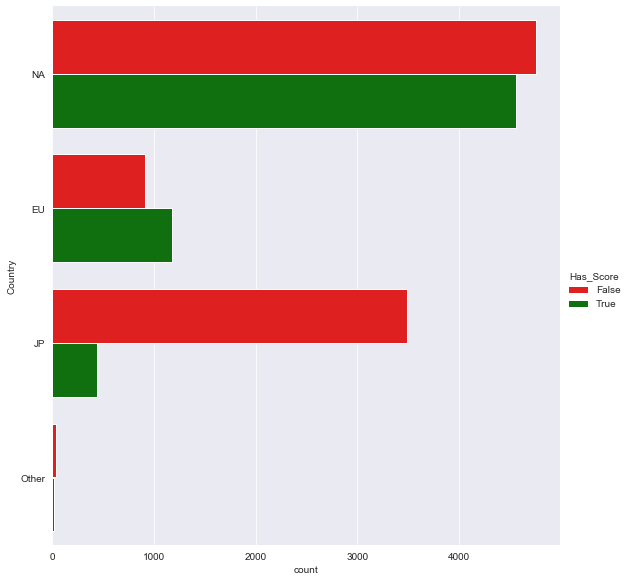

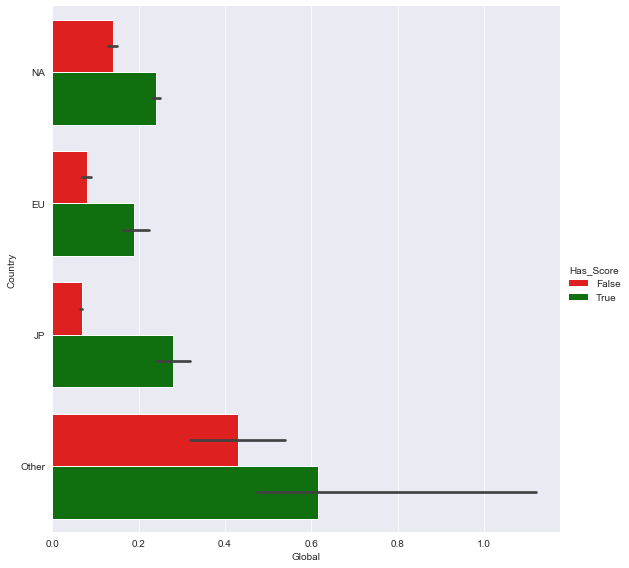

In [31]:
data["Country"] = data[["NA", "EU", "JP", "Other"]].idxmax(1, skipna=True)
palette = {True: "green", False: "red"}
sns.factorplot(y="Country", hue="Has_Score", data=data, size=8, kind="count", palette=palette)
sns.factorplot(y="Country", x="Global", hue="Has_Score", data=data, size=8, kind="bar", palette=palette,
               estimator=lambda x: np.median(x));

In [32]:
#Dropping multiple missing values 
scored = data.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000
mean,2007.422682,0.209774,0.112472,0.029221,0.039420,0.391119,68.976047,26.910706,7.139661,118.897181,10.577318
std,4.171197,0.231764,0.154954,0.094207,0.059871,0.389871,13.627623,17.416288,1.450253,424.446207,4.171197
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.100000,61.000000,13.000000,6.400000,10.000000,8.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.240000,71.000000,23.000000,7.500000,23.000000,11.000000
75%,2010.000000,0.290000,0.150000,0.000000,0.050000,0.560000,79.000000,37.000000,8.200000,66.000000,14.000000
max,2016.000000,1.670000,1.580000,1.390000,1.180000,1.690000,98.000000,106.000000,9.600000,10665.000000,33.000000


In [33]:
#Removing the outliers from especially where it doesn't make sense 
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,2007.055837,0.205403,0.098572,0.028995,0.036368,0.369597,67.815866,24.958439,7.124575,37.459523,10.944163
std,4.010373,0.225580,0.138941,0.095492,0.056428,0.367824,13.408831,15.689528,1.440391,44.572477,4.010373
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.010000,0.100000,60.000000,13.000000,6.400000,9.000000,8.000000
50%,2007.000000,0.130000,0.040000,0.000000,0.020000,0.230000,70.000000,22.000000,7.400000,20.000000,11.000000
75%,2010.000000,0.280000,0.130000,0.000000,0.047500,0.520000,78.000000,34.000000,8.200000,45.000000,14.000000
max,2016.000000,1.670000,1.160000,1.390000,1.130000,1.690000,98.000000,91.000000,9.600000,233.000000,33.000000


In [34]:
scored["Platform"].unique(), scored["Genre"].unique(), scored["Rating"].unique()

(array(['PS2', 'GBA', 'X360', 'PS3', 'PC', 'Wii', 'PSP', 'PS', 'XB', 'GC',
        'DS', 'XOne', '3DS', 'DC', 'PS4', 'WiiU', 'PSV'], dtype=object),
 array(['Shooter', 'Action', 'Role-Playing', 'Racing', 'Simulation',
        'Sports', 'Fighting', 'Platform', 'Misc', 'Strategy', 'Puzzle',
        'Adventure'], dtype=object),
 array(['M', 'E', 'T', 'E10+', 'RP'], dtype=object))

In [35]:
numeric_subset = scored.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Create a selection for the catagories
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

# Column binding
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

In [36]:
correlations.head(5)

Platform_5    -0.186725
Genre_10      -0.094686
Genre_12      -0.084227
Platform_17   -0.069683
Platform_15   -0.062370
Name: Global, dtype: float64

In [37]:
correlations.tail(5)

User_Score      0.155470
User_Count      0.252651
Critic_Score    0.281545
Critic_Count    0.292327
Global          1.000000
Name: Global, dtype: float64

C:\Users\ryanh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


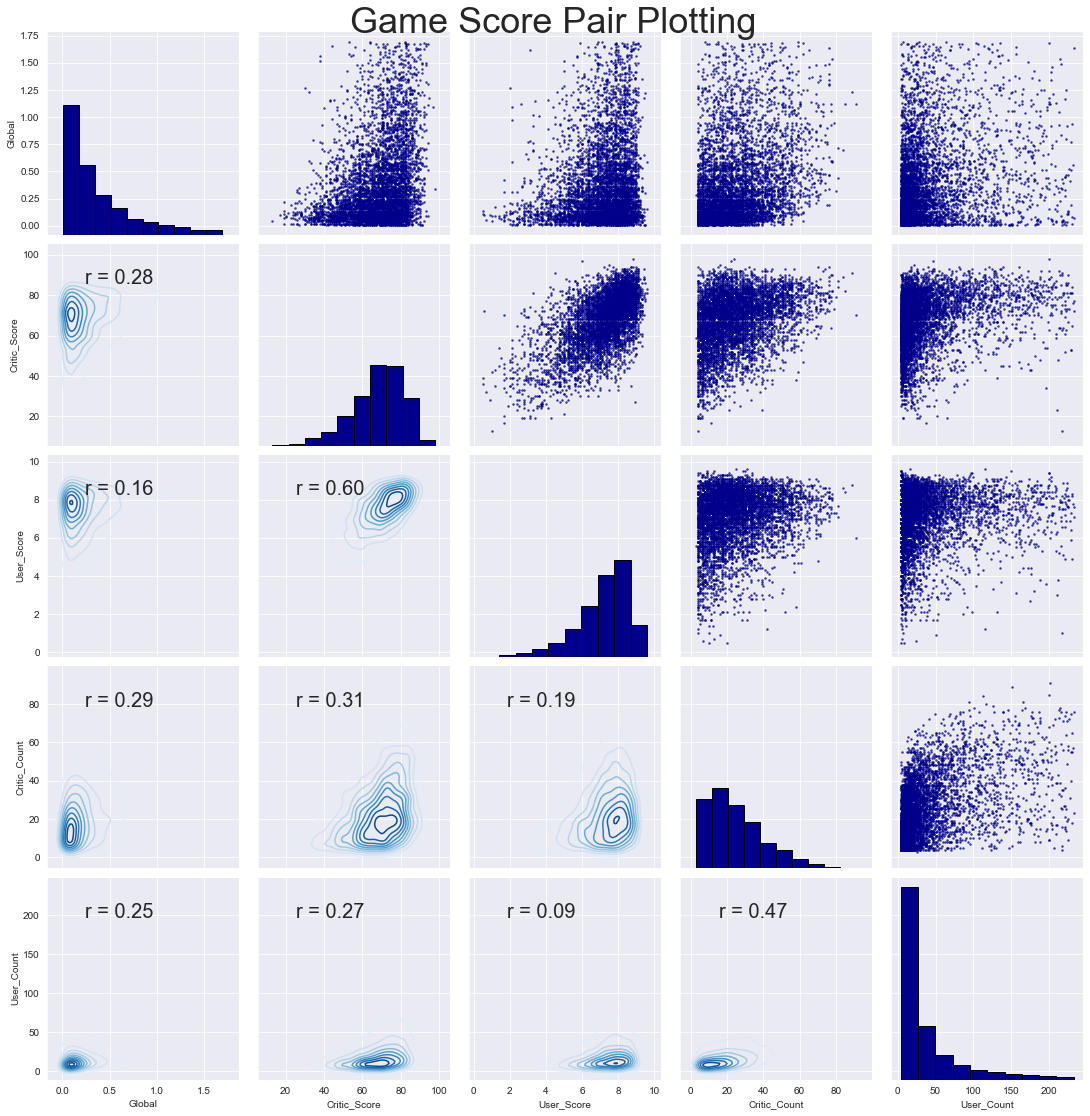

In [38]:
plot_data = features[["Global", "Critic_Score", "User_Score",
                      "Critic_Count", "User_Count"]]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    
# Defining Grid
grid = sns.PairGrid(data = plot_data, size = 3)

# Defining Scatters
grid.map_upper(plt.scatter, color = "darkblue", alpha = 0.6, marker=".", s=10)

# Defining Histograms
grid.map_diag(plt.hist, color = "darkblue", edgecolor="black")

# Defining Correplots 
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Blues)

# Title for entire plot
plt.suptitle("Game Score Pair Plotting", size = 36, y = 1.02);

In [39]:
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.3,
                                                                            random_state=77)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3873, 39)
(1661, 39)
(3873,)
(1661,)


<b> Classifier is not the way to go here </b>

In [29]:
from pandas import get_dummies
df_Class = pd.get_dummies(dgraph1)

In [30]:
y = df_Class['Hit'].values
df_Class = df_Class.drop(['Hit'],axis=1)
X = df_Class.values

In [301]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=77)

In [308]:
rfc = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = rfc.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  1.0


In [313]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking (top 10):')

for f in range(10):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df_Class.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking (top 10):
1. feature 332 Publisher_inXile Entertainment (0.000000)
2. feature 103 Publisher_Enterbrain (0.000000)
3. feature 105 Publisher_Essential Games (0.000000)
4. feature 106 Publisher_Evolved Games (0.000000)
5. feature 107 Publisher_Falcom Corporation (0.000000)
6. feature 108 Publisher_Flashpoint Games (0.000000)
7. feature 109 Publisher_Focus Home Interactive (0.000000)
8. feature 110 Publisher_Foreign Media Games (0.000000)
9. feature 111 Publisher_Fox Interactive (0.000000)
10. feature 112 Publisher_From Software (0.000000)


Something is wrong here the data is not reading in well so let's fix. 5 million may be tooo much. 

In [102]:
dataClassifier = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [103]:
DidWell = dataClassifier.loc[:, "Global_Sales"] > 1.0 #let's try 1 million

dataClassifier.loc[DidWell, "Global_Sales"] = 1
dataClassifier.loc[~DidWell, "Global_Sales"] = 0

nullRemoved = dataClassifier.dropna(axis=0) #Let's again remove those missing values
nullRemoved = nullRemoved.astype({'User_Score':float})

In [104]:
from tabulate import tabulate
tabulate(nullRemoved.info(), headers='keys', tablefmt='psql')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


''

In [105]:
#ahhhh haaa its the ratings partly throwing
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "AO", "Rating"] = "M"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "K-A", "Rating"] = "E"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "RP", "Rating"] = "T"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "E10+", "Rating"] = "E"

In [106]:
#remaking X and Y
target =  nullRemoved[['Global_Sales']].values #y
features = nullRemoved[['Platform','Genre','Critic_Score','Critic_Count','User_Score','User_Count','Rating']]

In [107]:
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "AO", "Rating"] = "M"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "K-A", "Rating"] = "E"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "RP", "Rating"] = "T"
nullRemoved.loc[nullRemoved.loc[:, "Rating"] == "E10+", "Rating"] = "E"

In [108]:
#Defining our target and features again
target =  nullRemoved[['Global_Sales']].values #y
features = nullRemoved[['Platform','Genre','Critic_Score','Critic_Count','User_Score','User_Count','Rating']] #X

In [109]:
#Creating a pipline to encode features
preprocess = make_column_transformer(
    (StandardScaler(), ['Critic_Score', 'Critic_Count','User_Score','User_Count' ]), #features scale
    (OneHotEncoder(), ['Platform', 'Genre', 'Rating']) #OHE categorical features
)

In [110]:
#scaling via kmeans
kmeans_features = preprocess.fit_transform(features).toarray()

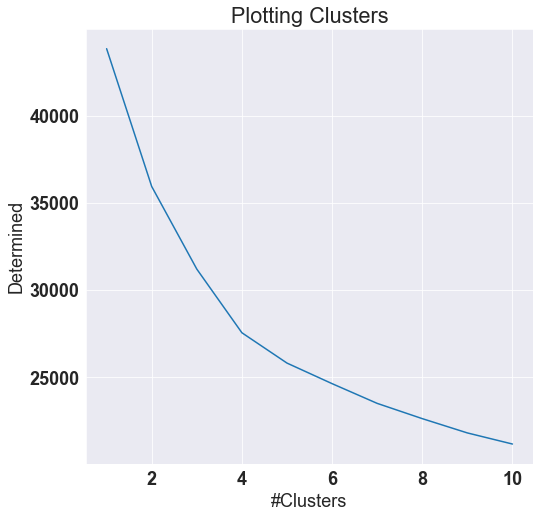

In [111]:
#How many clusters are ideal here
determine = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 77)
    kmeans.fit(kmeans_features)
    determine.append(kmeans.inertia_)
plt.plot(range(1, 11), determine)
plt.title('Plotting Clusters')
plt.xlabel('#Clusters')
plt.ylabel('Determined')
plt.show()

Looks like 4 clusters are best

In [112]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 77)
y_kmeans = kmeans.fit_predict(kmeans_features)

In [113]:
features = features.assign(Kmeans_labels=pd.Series(y_kmeans, index=features.index))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=77)

In [115]:
model = make_pipeline(
    preprocess,
    LogisticRegression(solver='lbfgs',penalty='l2'))
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
print("Logistic Regression Score: %f" % model.score(X_test, y_test))

Logistic Regression Score: 0.849121


In [116]:
BProb = model.predict_proba(features)
probabilities = BProb[:,1]

In [117]:
rfcClass = make_pipeline(
        preprocess,
        RandomForestClassifier(n_estimators=100))
rfcClass.fit(X_train, y_train.ravel())
y_pred2 = rfcClass.predict(X_test)
print("\nRandom Forest Score: %f" % rfcClass.score(X_test, y_test)) 


Random Forest Score: 0.873047


In [118]:
Bprob2 = rfcClass.predict_proba(features)
probabilities2 = Bprob2[:,1]

In [119]:
cm = confusion_matrix(y_test, y_pred)
print ('\nLogistic Regression Confusion Matrix and Metrics')
Threshold = 0.3 # Some number between 0 and 1
print ("\nProbability Threshold is chosen to be:", Threshold)
predictions = (probabilities > Threshold).astype(int)
tn, fp, fn, tp = cm.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nPrecision:",metrics.precision_score(y_test, y_pred))
print("\nRecall:",metrics.recall_score(y_test, y_pred))
print("\nF1:",metrics.f1_score(y_test, y_pred))
print("\nAverage precision-recall score:",metrics.average_precision_score(y_test, y_pred))


Logistic Regression Confusion Matrix and Metrics

Probability Threshold is chosen to be: 0.3

TP, TN, FP, FN: 155 , 1584 , 74 , 235

Accuracy: 0.84912109375

Precision: 0.6768558951965066

Recall: 0.3974358974358974

F1: 0.5008077544426495

Average precision-recall score: 0.38375292389220134


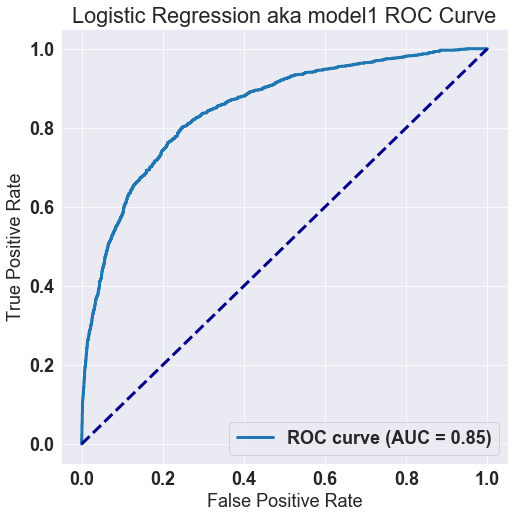

In [120]:
fpr, tpr, th = roc_curve(target, probabilities)
AUC = auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('Logistic Regression aka model1 ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='darkblue', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")

In [121]:
cm2 = confusion_matrix(y_test, y_pred2)
print ('\nRandom Forest Confusion Matrix and Metrics')
Threshold = 0.01 # Some number between 0 and 1
print ("Probability Threshold is chosen to be:", Threshold)
predictions = (probabilities2 > Threshold).astype(int)
tn, fp, fn, tp = cm2.ravel()
print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred2))
print("\nPrecision:",metrics.precision_score(y_test, y_pred2))
print("\nRecall:",metrics.recall_score(y_test, y_pred2))
print("\nF1:",metrics.f1_score(y_test, y_pred2))
print("\nAverage precision-recall score:",metrics.average_precision_score(y_test, y_pred2))


Random Forest Confusion Matrix and Metrics
Probability Threshold is chosen to be: 0.01
TP, TN, FP, FN: 198 , 1590 , 68 , 192

Accuracy: 0.873046875

Precision: 0.7443609022556391

Recall: 0.5076923076923077

F1: 0.603658536585366

Average precision-recall score: 0.4716563042220937


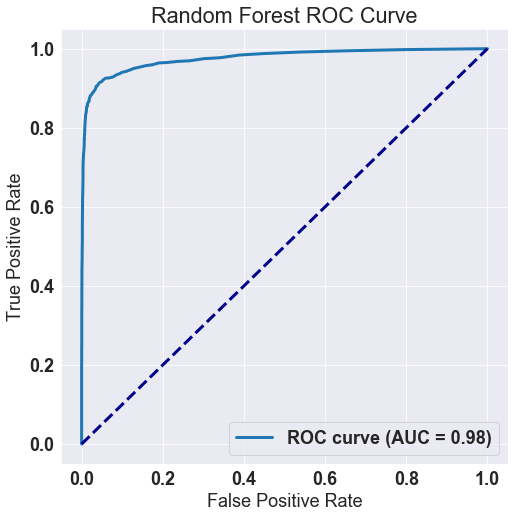

In [122]:
fpr, tpr, th = roc_curve(target, probabilities2)
AUC = auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='darkblue', LW=3, linestyle='--') 
plt.legend(loc="lower right")
plt.show()

In [123]:
X_train2  = preprocess.fit_transform(X_train).toarray()
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
out = []
# need to use preprocess to scale and encode X_train and y_train
for name, model in models:
    #model = preprocess.fit_transform(features).toarray()
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train2, y_train.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\ryanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ryanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.847602 (0.011695)
LDA: 0.845717 (0.011068)

C:\Users\ryanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



KNN: 0.838396 (0.017165)
CART: 0.816197 (0.020760)


C:\Users\ryanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ryanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.651465 (0.067757)


C:\Users\ryanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.847399 (0.010148)


C:\Users\ryanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.873142 (0.012641)


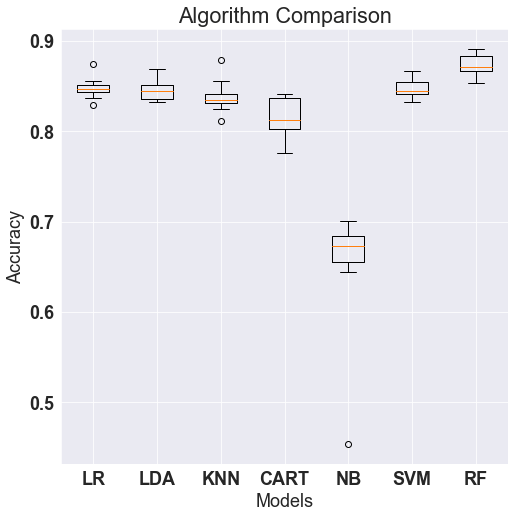

In [124]:
plt.figure() #created empty frame for plt
pyplot.boxplot(results, labels=names)
#pyplot.subplot()
pyplot.title('Algorithm Comparison')
pyplot.xlabel('Models')
pyplot.ylabel('Accuracy')
#plt.xlim(right=20)
#plt.subplot(888)
pyplot.show()

Soo random forest performed best of this group, let's optimize it.

In [149]:
loss = ["ls", "lad", "huber"]

# how deep is our tree
max_depth = [2, 3, 5, 10, 15]

# min per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Min samples to split node
min_samples_split = [2, 4, 6, 10]

# max features to consider before split
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [150]:
from sklearn.feature_selection import RFECV

In [151]:
rfcBest = RandomForestClassifier(n_estimators=100, 
                                        random_state=77,
                                        class_weight="balanced") 

In [152]:
rfecv = RFECV(estimator=rfcBest, 
              step=1, 
              cv=4, 
              scoring = 'roc_auc')

In [153]:
rcfFinal = RandomForestClassifier(n_estimators=100, 
                             random_state=77,
                             class_weight="balanced") 

In [154]:
CV_rfc = GridSearchCV(rcfFinal, 
                      param_grid=hyperparameter_grid,
                      cv= 4, scoring = 'roc_auc')

In [155]:
from sklearn.pipeline import Pipeline

In [156]:
pipeline  = Pipeline([('feature_sele',rfecv),
                      ('clf_cv',CV_rfc)])

In [157]:
#getting an error on the string values need to drop platform, genre, and ratings 
X_train2 = X_train.drop(['Platform'], axis=1)
X_train2 = X_train2.drop(['Genre'], axis=1)
X_train2 = X_train2.drop(['Rating'], axis=1)
X_test2 = X_test.drop(['Genre'], axis=1)
X_test2 = X_test2.drop(['Platform'], axis=1)
X_test2 = X_test2.drop(['Rating'], axis=1)

In [166]:
pipeline.fit(X_train2, y_train.ravel())#Please change the shape of y to (n_samples,), for example using ravel().

Pipeline(memory=None,
         steps=[('feature_sele',
                 RFECV(cv=4,
                       estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
 

In [171]:
BestProb = pipeline.predict(X_test2)

In [169]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)
print(CV_rfc.best_estimator_)

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8209621669186675
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=77, verbose=0,
                       warm_start=False)


We actually lost score... look at that .82 ROC

In [170]:
Best_classifier = CV_rfc.best_estimator_

<b> Classifiers do not perform as well outside of standard conditions. </b> Ultimately our best model was the standard .92 from RFC when n=100 this maybe due to the droppign of the string features as they wouldn't fit the second round. <i>This section was not in the initial submission. As there was a bit of code that didn't run in a kernel and that invalidated the run.</i>

<b> What happens when we apply a unsupervised technique like kernal-PCA our data what does it reveal about the top 5 Principal Components </b>

In [238]:
kpca = KernelPCA(n_components=100, kernel='rbf', n_jobs=-1, remove_zero_eig=True)
kpca.fit(features_train)

X_train_kpca = kpca.transform(features_train)
X_test_kpca = kpca.transform(features_test)

In [239]:
X_train_kpca = X_train_kpca[:, 0:5]
X_test_kpca = X_test_kpca[:, 0:5]
#taking the first 30 because that nearly fried my machine n_n

In [240]:
print(X_train_kpca)

[[-7.61868660e-02  3.13534012e-03 -1.24346361e-02 -6.58102461e-02
  -2.88323603e-05]
 [-2.13492996e-01 -8.99623146e-02 -1.22731733e-01  1.08084259e-01
  -2.14434044e-01]
 [-1.00014266e-01  1.44893123e-01  1.68140014e-01 -6.76889350e-02
   1.49972607e-01]
 ...
 [ 2.72439046e-01 -5.71893468e-02 -1.37535971e-01 -6.40085138e-02
   2.67412545e-01]
 [ 5.80844304e-01  3.96609028e-01 -3.04219300e-02  3.16228928e-01
  -1.10267046e-01]
 [-1.45583212e-01 -1.07786236e-02 -4.57652883e-02 -1.19462810e-01
  -1.47900621e-01]]


In [241]:
print(X_test_kpca)

[[-7.60116340e-02  3.12582249e-03 -1.23955748e-02 -6.55505477e-02
  -2.86997096e-05]
 [-9.09602409e-02  1.13358234e-03 -2.19191040e-02 -6.74257057e-02
  -7.83570397e-03]
 [-7.58913541e-02  3.11929111e-03 -1.23687703e-02 -6.53723843e-02
  -2.86087251e-05]
 ...
 [-2.02310420e-01 -6.58117857e-02 -9.64314993e-02  1.71479084e-02
  -2.37923029e-01]
 [ 1.32057290e-01  3.01292312e-02 -1.56623054e-01 -1.41472679e-01
   2.70541722e-01]
 [-9.81203551e-02 -3.59468613e-03 -3.44606599e-02 -1.54526053e-02
   2.59939981e-02]]


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
f_scale = StandardScaler().fit(features_train)
df_scale = f_scale.transform(features_train)

f2_scale = StandardScaler().fit(features_test)
df2_scale = f2_scale.transform(features_test)

In [41]:
print(df_scale[:, 0].mean())
print(df_scale[:, 0].std())

print(df2_scale[:, 0].mean())
print(df2_scale[:, 0].std())

8.439185604173667e-17
1.0
4.256411933060203e-16
1.0


In [44]:
pm_pca = PCA(n_components = 0.8).fit(df_scale)

In [45]:
pm_pca2 = PCA(n_components = 0.8).fit(df2_scale)

In [47]:
scores = pd.DataFrame(pm_pca.transform(df_scale))
loadings = pd.DataFrame(pm_pca.components_)#We would add columns = X if we could label features

In [48]:
scores2 = pd.DataFrame(pm_pca.transform(df_scale))
loadings2 = pd.DataFrame(pm_pca2.components_)

[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9'),
 Text(0, 10.5, '10'),
 Text(0, 11.5, '11'),
 Text(0, 12.5, '12'),
 Text(0, 13.5, '13'),
 Text(0, 14.5, '14'),
 Text(0, 15.5, '15'),
 Text(0, 16.5, '16'),
 Text(0, 17.5, '17'),
 Text(0, 18.5, '18'),
 Text(0, 19.5, '19'),
 Text(0, 20.5, '20'),
 Text(0, 21.5, '21'),
 Text(0, 22.5, '22'),
 Text(0, 23.5, '23'),
 Text(0, 24.5, '24'),
 Text(0, 25.5, '25'),
 Text(0, 26.5, '26'),
 Text(0, 27.5, '27'),
 Text(0, 28.5, '28'),
 Text(0, 29.5, '29'),
 Text(0, 30.5, '30'),
 Text(0, 31.5, '31'),
 Text(0, 32.5, '32'),
 Text(0, 33.5, '33'),
 Text(0, 34.5, '34'),
 Text(0, 35.5, '35'),
 Text(0, 36.5, '36'),
 Text(0, 37.5, '37'),
 Text(0, 38.5, '38')]

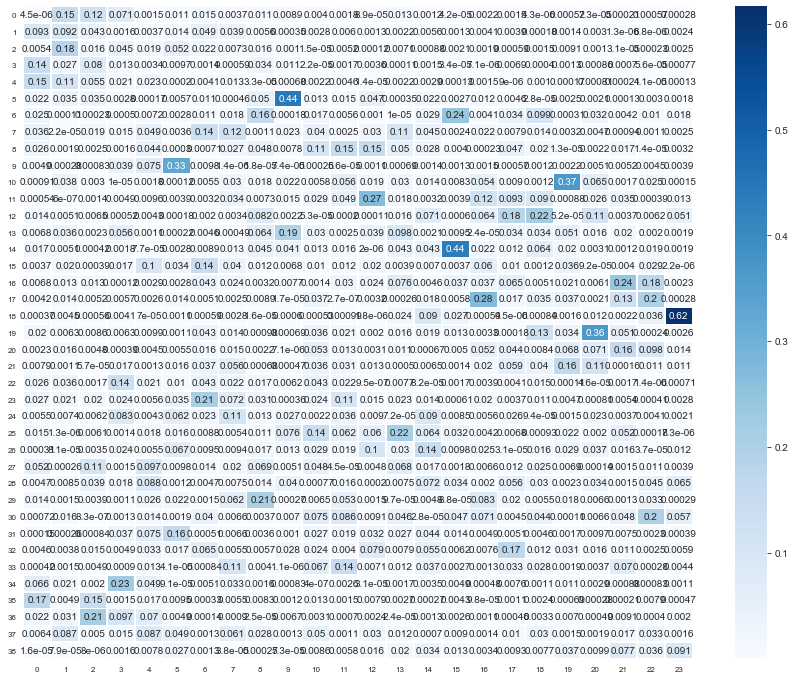

In [49]:
loadingL = loadings ** 2
pm_pca_heatmap = sns.heatmap(loadingL.transpose(), linewidths = 0.5, cmap = "Blues", annot = True)
pm_pca_heatmap.set_xticklabels(pm_pca_heatmap.xaxis.get_majorticklabels(), rotation = 0, fontsize = 8)
pm_pca_heatmap.set_yticklabels(pm_pca_heatmap.yaxis.get_majorticklabels(), rotation = 0, fontsize = 8)

[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9'),
 Text(0, 10.5, '10'),
 Text(0, 11.5, '11'),
 Text(0, 12.5, '12'),
 Text(0, 13.5, '13'),
 Text(0, 14.5, '14'),
 Text(0, 15.5, '15'),
 Text(0, 16.5, '16'),
 Text(0, 17.5, '17'),
 Text(0, 18.5, '18'),
 Text(0, 19.5, '19'),
 Text(0, 20.5, '20'),
 Text(0, 21.5, '21'),
 Text(0, 22.5, '22'),
 Text(0, 23.5, '23'),
 Text(0, 24.5, '24'),
 Text(0, 25.5, '25'),
 Text(0, 26.5, '26'),
 Text(0, 27.5, '27'),
 Text(0, 28.5, '28'),
 Text(0, 29.5, '29'),
 Text(0, 30.5, '30'),
 Text(0, 31.5, '31'),
 Text(0, 32.5, '32'),
 Text(0, 33.5, '33'),
 Text(0, 34.5, '34'),
 Text(0, 35.5, '35'),
 Text(0, 36.5, '36'),
 Text(0, 37.5, '37'),
 Text(0, 38.5, '38')]

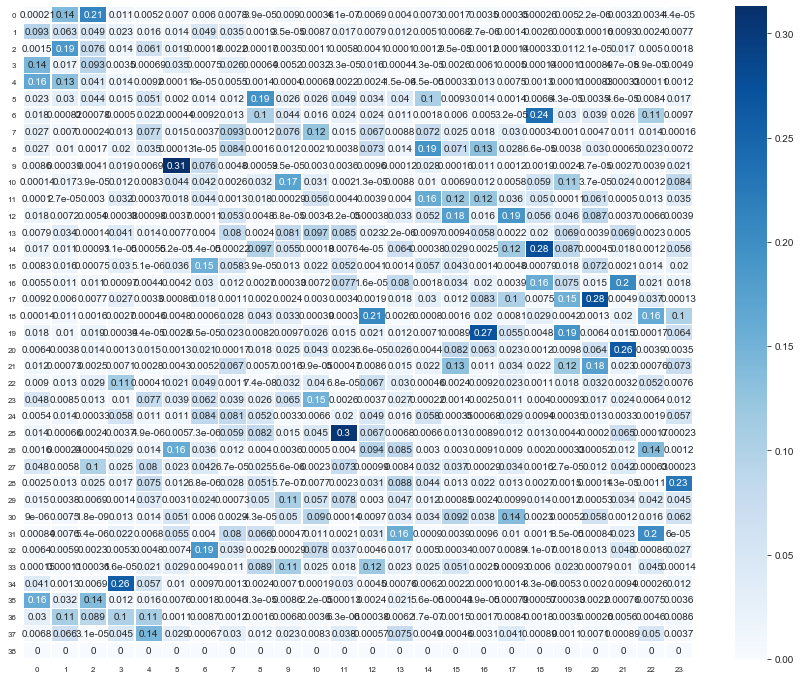

In [50]:
loadingL2 = loadings2 ** 2
pm_pca_heatmap = sns.heatmap(loadingL2.transpose(), linewidths = 0.5, cmap = "Blues", annot = True)
pm_pca_heatmap.set_xticklabels(pm_pca_heatmap.xaxis.get_majorticklabels(), rotation = 0, fontsize = 8)
pm_pca_heatmap.set_yticklabels(pm_pca_heatmap.yaxis.get_majorticklabels(), rotation = 0, fontsize = 8)

In [52]:
#Kmeans Clustering
pm_pca_k = PCA(n_components = 0.8).fit_transform(df_scale)
pm_pca_k2 = PCA(n_components = 0.8).fit_transform(df2_scale)

In [53]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters = 4).fit(pm_pca_k)
kmeans_pca2 = KMeans(n_clusters = 4).fit(pm_pca_k2)

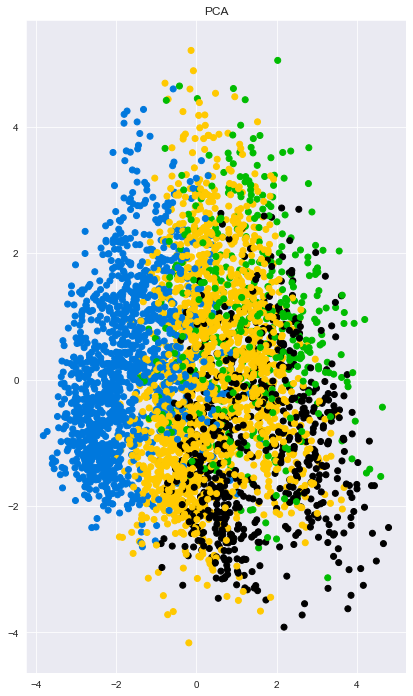

In [54]:
cmap = plt.get_cmap('nipy_spectral')
plt.subplot(1,2,2)
plt.scatter(pm_pca_k[:, 0], pm_pca_k[:, 1], c = cmap(kmeans_pca.labels_ / 4))
plt.title('PCA');

In [58]:
stat_cluster = pd.DataFrame(kmeans_pca.cluster_centers_.T)
stat_cluster

,0,1,2,3
0,1.482974,-1.762723,1.395510,0.389785
1,-1.036187,0.155049,0.918908,0.070281
2,0.049357,0.936257,0.753302,-0.945200
3,1.834955,0.135784,-1.055636,-0.592786
4,0.639727,-0.256306,0.479987,-0.191970
5,-0.038324,0.039181,1.474656,-0.399552
6,0.092200,0.131715,-1.193924,0.170976
7,0.367797,0.088905,0.209360,-0.276690
8,0.097946,0.090188,-0.043983,-0.099361
9,-0.019333,0.012705,0.074297,-0.021240


<b> Let's begin supervised breakdown across serveral models </b>

In [185]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

In [186]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.23
Baseline Performance on the test set: MAE = 0.2602


In [187]:
#Fitting and Predciting with one Call 
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [188]:
#Regular Regression
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

Linear Regression Performance on the test set: MAE = 0.2272


In [189]:
#Support Vector
svm = SVR(C = 1000, gamma=0.1) #Base Parameters
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.2779


In [190]:
#Random Forest
random_forest = RandomForestRegressor(random_state=77)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

Random Forest Regression Performance on the test set: MAE = 0.2126


In [191]:
#Gradient Boost
gradient_boosting = GradientBoostingRegressor(random_state=77)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.2114


In [192]:
#Knn With double normal neighbors so 10
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.2499


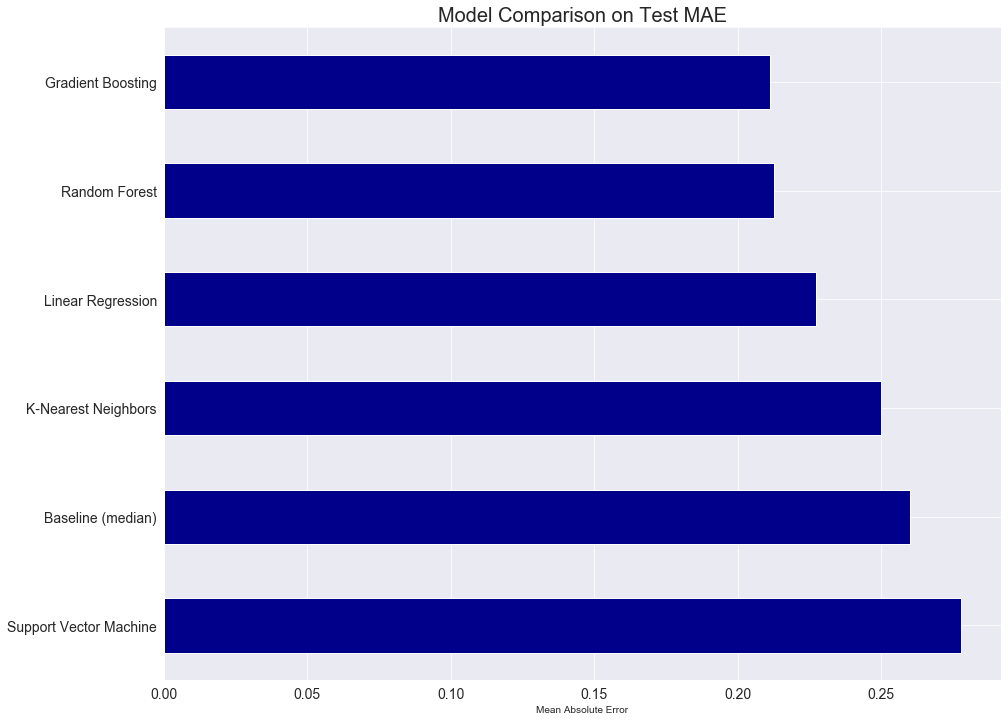

In [193]:
#Comparing our models 
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="darkblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

<b> Gradient Boost is Producing has the Lowest Error though Random Forest is also performing noticably better. Let's focus in on the best performing models as they might offer us the best result and clearest answer to our objective. </b>

In [194]:
#Let's set some hyperparameters up for our random/gridsearching efforts
loss = ["ls", "lad", "huber"]

# how deep is our tree
max_depth = [2, 3, 5, 10, 15]

# min per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Min samples to split node
min_samples_split = [2, 4, 6, 10]

# max features to consider before split
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [195]:
#Basic Model will be our Gradient Boosted Model at its Original Values
basic_model = GradientBoostingRegressor(random_state = 77)
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
#according to the above randomize performs worse so I will do a grid as well
random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=77)

In [196]:
random_cv.fit(features_train, target_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [197]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_score,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
2,-0.201317,lad,15,8,4,sqrt
3,-0.202600,lad,10,6,2,log2
9,-0.203528,lad,10,2,4,log2
16,-0.204197,lad,5,2,10,None
11,-0.204719,lad,10,2,4,None
7,-0.206584,lad,15,4,6,auto
13,-0.207838,huber,5,1,10,log2
18,-0.211182,huber,3,1,10,None
17,-0.211326,lad,3,2,4,sqrt
5,-0.211906,huber,10,8,6,None


In [198]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad',
                          max_depth=15, max_features='sqrt',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=8,
                          min_samples_split=4, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          presort='deprecated', random_state=77, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

In [199]:
#gridsearch to elevated the prior model
BModel_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

RCbasic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=RCbasic_model, param_grid=BModel_grid, cv=5, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

In [200]:
grid_search.fit(features_train, target_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.3s finished


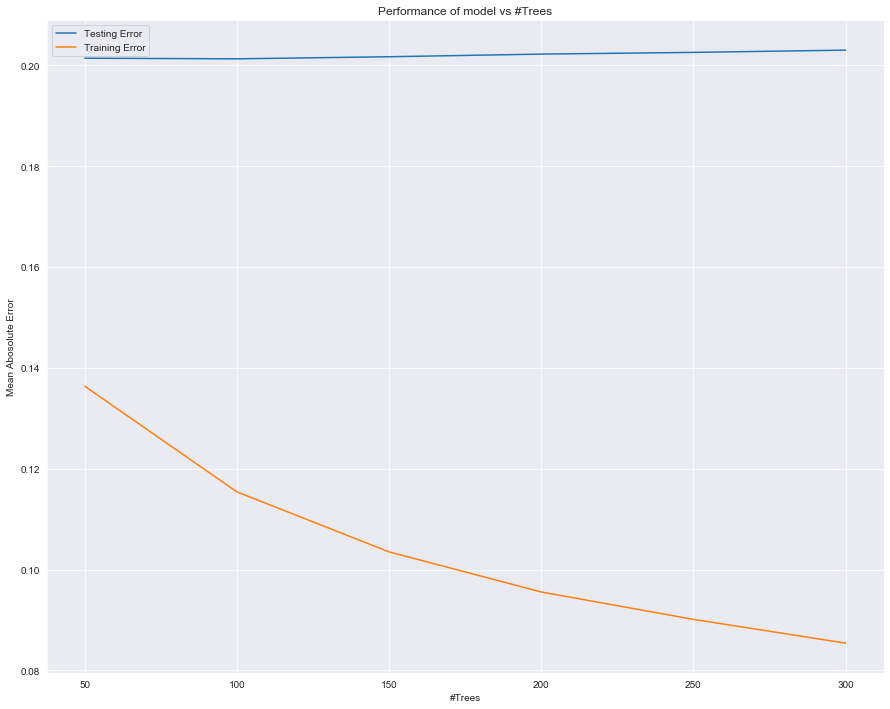

In [201]:
#Our gridsearch for number of trees and its performance on both test and training 
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("#Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance of model vs #Trees");

In [202]:
basic_final_model = grid_search.best_estimator_
basic_final_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad',
                          max_depth=15, max_features='sqrt',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=8,
                          min_samples_split=4, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          presort='deprecated', random_state=77, subsample=1.0,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

In [203]:
basic_final_pred = basic_final_model.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.1962.


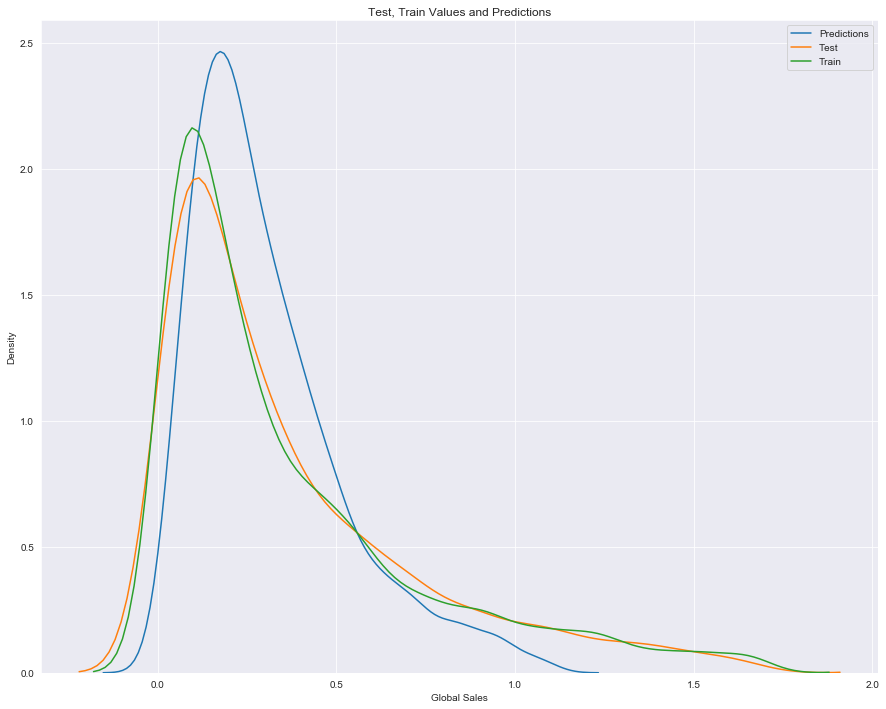

In [204]:
#How well did our prediction fair against test and train ... looks like it did better
sns.kdeplot(basic_final_pred, label = "Predictions")
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

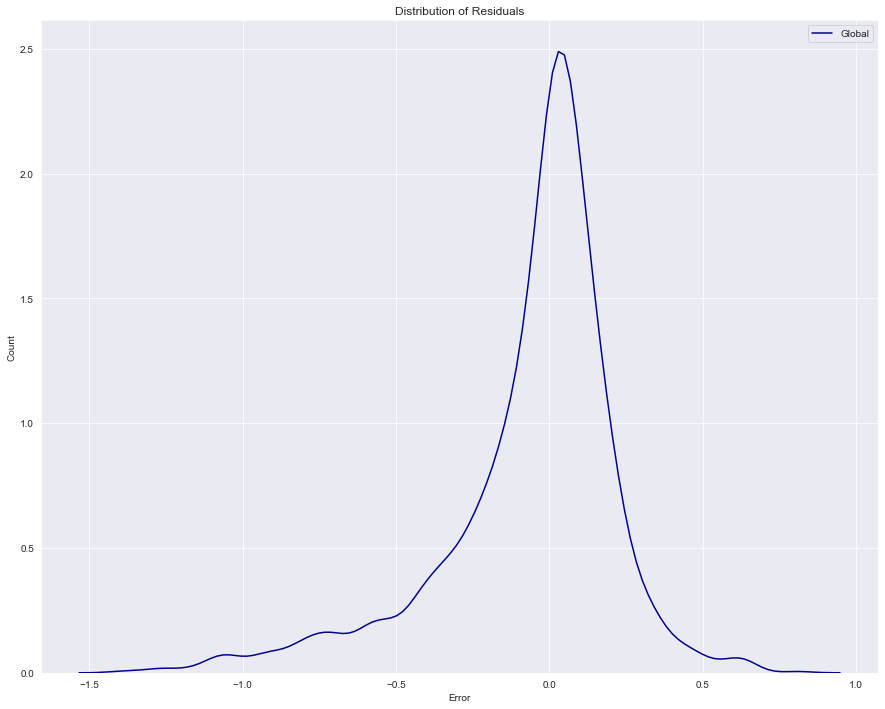

In [205]:
#Plotting our basic hyperparameter gradient boost
basic_residuals = basic_final_pred - target_test

sns.kdeplot(basic_residuals, color = "darkblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");

In [207]:
#Developing developer weighted scores to score the developer 
scored["Weighted_Score"] = (scored["User_Score"] * 10 * scored["User_Count"] + 
                            scored["Critic_Score"] * scored["Critic_Count"]) / (scored["User_Count"] + scored["Critic_Count"])
devs = pd.DataFrame({"dev": scored["Developer"].value_counts().index,
                     "count": scored["Developer"].value_counts().values})
m_score = pd.DataFrame({"dev": scored.groupby("Developer")["Weighted_Score"].mean().index,
                        "mean_score": scored.groupby("Developer")["Weighted_Score"].mean().values})
devs = pd.merge(devs, m_score, on="dev")
devs = devs.sort_values(by="count", ascending=True)
devs["percent"] = devs["count"] / devs["count"].sum()
devs["top%"] = devs["percent"].cumsum() * 100
n_groups = 5
devs["top_group"] = (devs["top%"] * n_groups) // 100 + 1
devs["top_group"].iloc[-1] = n_groups
devs

C:\Users\ryanh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,dev,count,mean_score,percent,top%,top_group
1179,Realism Ltd,1,83.419355,0.000181,0.018070,1.0
842,Babylon Software,1,53.571429,0.000181,0.036140,1.0
843,Sunflowers Interactive,1,76.272727,0.000181,0.054210,1.0
844,Toka,1,48.500000,0.000181,0.072280,1.0
845,"Activision, Behaviour Interactive",1,64.782609,0.000181,0.090351,1.0
...,...,...,...,...,...,...
4,Konami,78,70.298654,0.014095,92.410553,5.0
3,Ubisoft,86,65.797942,0.015540,93.964583,5.0
2,Capcom,92,74.710656,0.016625,95.627033,5.0
1,EA Sports,116,75.755345,0.020961,97.723166,5.0


C:\Users\ryanh\anaconda3\lib\site-packages\seaborn\axisgrid.py:1673: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


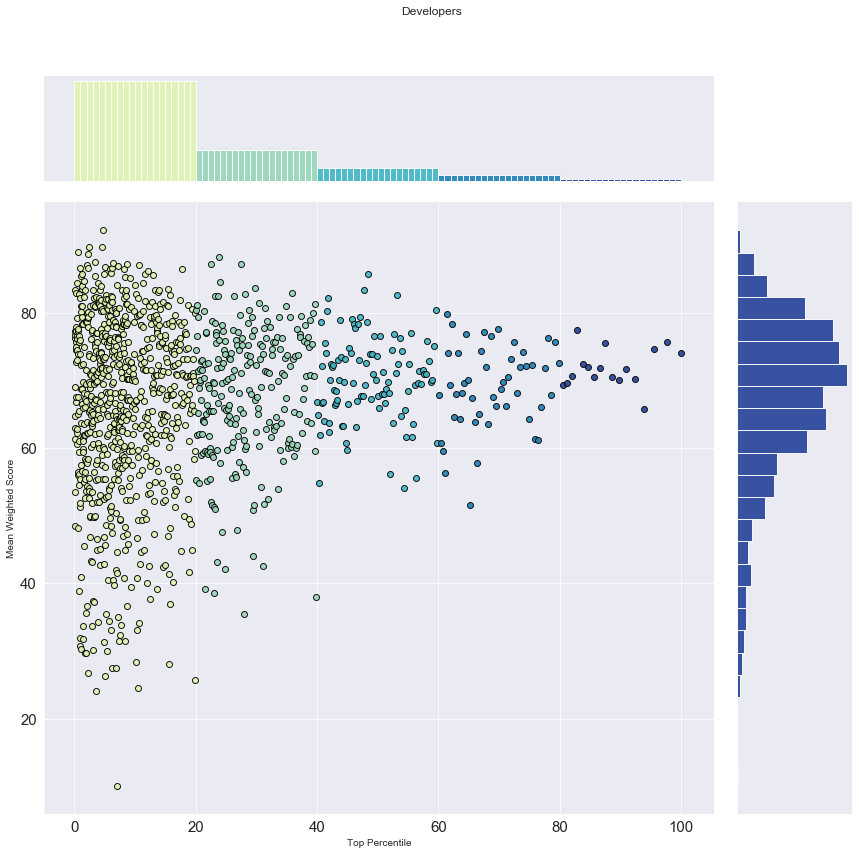

In [208]:
#Comparing the Mean Weight Scores by percentile
pal = sns.color_palette("YlGnBu", n_groups)
g = sns.JointGrid(x="top%", y="mean_score", data=devs, size=12)
legend_elements = []
for k in range(0, n_groups):
    g.ax_joint.scatter(devs[devs["top_group"]==k+1]["top%"], 
                       devs[devs["top_group"]==k+1]["mean_score"],
                       color=pal[k], alpha=.9, edgecolor="black")
    legend_elements.append(Line2D([0], [0], label=k+1, marker="o", ls="", 
                                  mfc=pal[k], mec=pal[k], alpha=.9, markersize=15))
    g.ax_marg_x.bar(np.arange(k * 100 / n_groups, (k+1) * 100 / n_groups), 
                    devs[devs["top_group"]==k+1].shape[0], 
                    width=1, align="edge", color=pal[k], alpha=.9)
g.ax_marg_y.hist(devs["mean_score"], color=pal[-1], alpha=.9,
                 orientation="horizontal", bins=25, edgecolor="white")
g.set_axis_labels("Top Percentile", "Mean Weighted Score")
g.ax_joint.tick_params(labelsize=15)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
#g.ax is handling legend elements
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Developers");

In [211]:
data["Critic_Score"].fillna(0.0, inplace=True)
data["Critic_Count"].fillna(0.0, inplace=True)
data["User_Score"].fillna(0.0, inplace=True)
data["User_Count"].fillna(0.0, inplace=True)
data = data.join(devs.set_index("dev")["top_group"], on="Developer")
data = data.rename(columns={"top_group": "Developer_Rank"})
data["Developer_Rank"].fillna(0.0, inplace=True)
data["Rating"].fillna("None", inplace=True)

In [212]:
tmp, rmvd_tmp = rm_outliers(data[data["User_Count"] != 0], ["User_Count"])
data.drop(rmvd_tmp.index, axis=0, inplace=True)

In [213]:
data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                            data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])
data["Weighted_Score"].fillna(0.0, inplace=True)

In [214]:
data.info()#Quick Peak at our transformations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 1058 to 16718
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14743 non-null  object 
 1   Platform        14743 non-null  object 
 2   Year            14743 non-null  int64  
 3   Genre           14743 non-null  object 
 4   Publisher       14712 non-null  object 
 5   NA              14743 non-null  float64
 6   EU              14743 non-null  float64
 7   JP              14743 non-null  float64
 8   Other           14743 non-null  float64
 9   Global          14743 non-null  float64
 10  Critic_Score    14743 non-null  float64
 11  Critic_Count    14743 non-null  float64
 12  User_Score      14743 non-null  float64
 13  User_Count      14743 non-null  float64
 14  Developer       8519 non-null   object 
 15  Rating          14743 non-null  object 
 16  Age             14743 non-null  int64  
 17  Has_Score       14743 non-nu

In [215]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [216]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

In [217]:
data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
scored["Grouped_Platform"] = scored["Platform"].apply(lambda x: get_group_label(x, platforms))

In [220]:
numeric_subset = data.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical columns
categorical_subset = data[["Grouped_Platform", "Genre", "Rating"]]

# One hot encode
# categorical_subset = pd.get_dummies(categorical_subset)

mapping = []
for cat in categorical_subset.columns:
    tmp = scored.groupby(cat).median()["Weighted_Score"]
    mapping.append({"col": cat, "mapping": [x for x in np.argsort(tmp).items()]})
    
encoder = ce.ordinal.OrdinalEncoder()
categorical_subset = encoder.fit_transform(categorical_subset, mapping=mapping)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

In [221]:
target = pd.Series(features["Global"])
features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.3,
                                                                            random_state=77)
baseline_guess = np.median(target_train)
baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(baseline_mae))

Baseline guess for global sales is: 0.14
Baseline Performance on the test set: MAE = 0.2134


In [222]:
model = GradientBoostingRegressor(random_state = 77)

random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=77)
random_cv.fit(features_train, target_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [223]:
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=5, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)
grid_search.fit(features_train, target_train);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


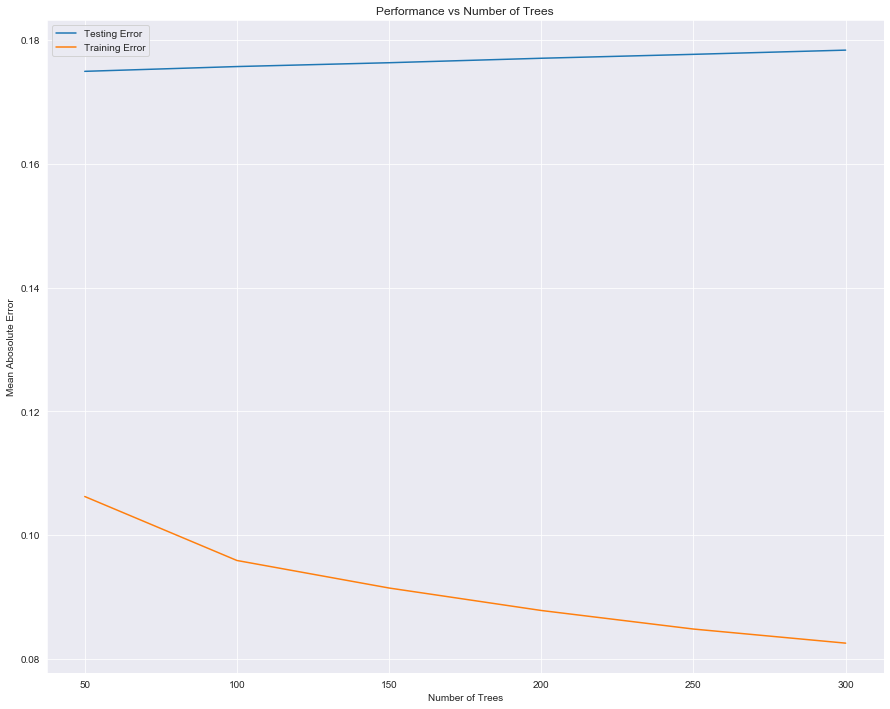

In [224]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

In [225]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(features_test)
final_mae = mae(target_test, final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(final_mae))

Final model performance on the test set: MAE = 0.1703.


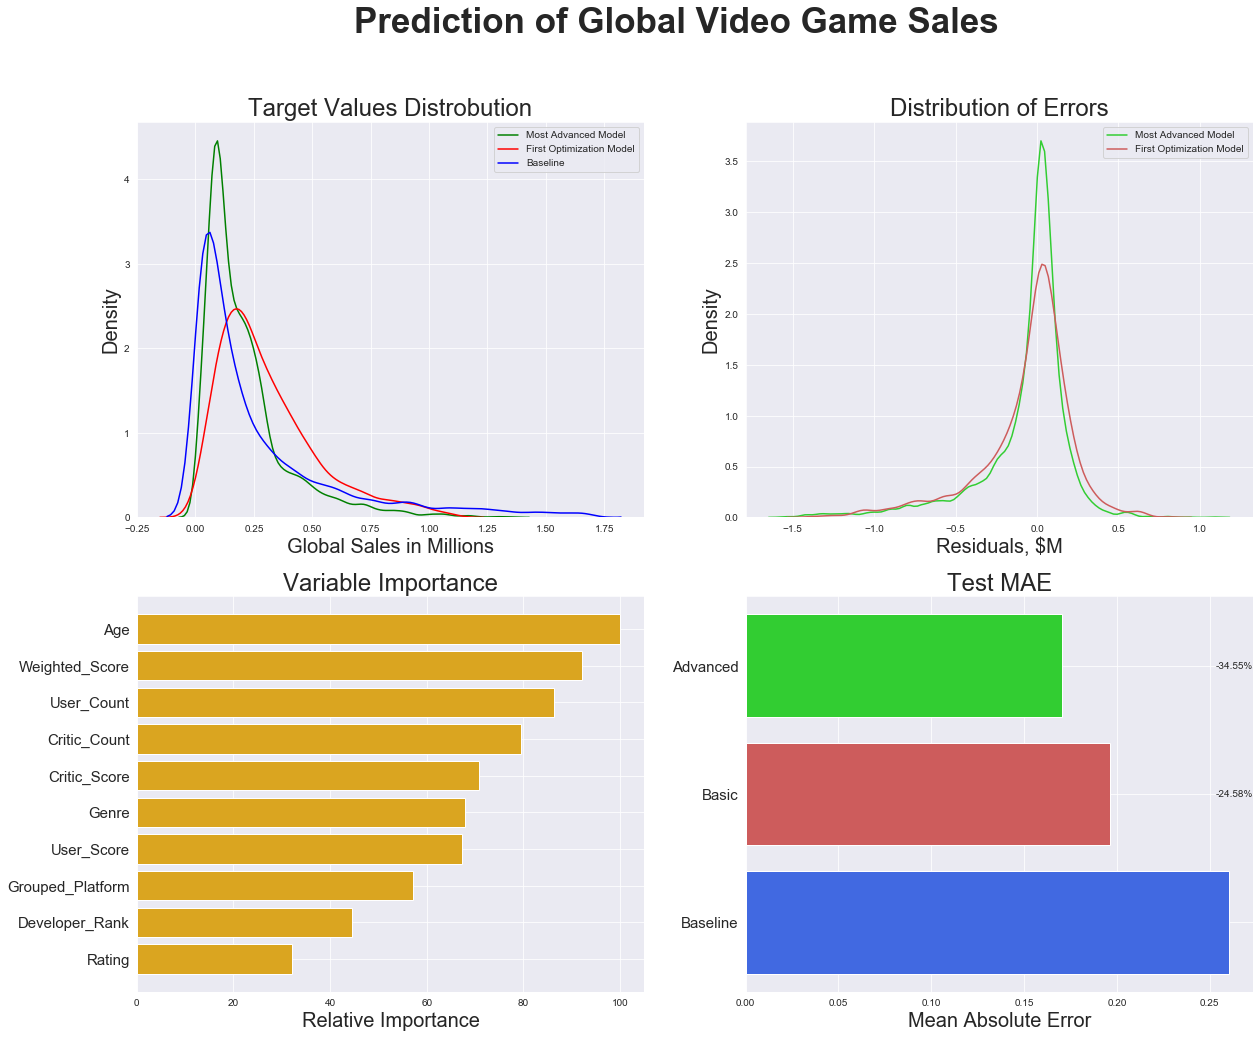

In [226]:
figsize(20, 16)

fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

plt.suptitle("Prediction of Global Video Game Sales", size=35, weight="bold");

ax = fig.add_subplot(gs[0, 0])
plt.sca(ax)
sns.kdeplot(final_pred, color="green", label="Most Advanced Model")
sns.kdeplot(basic_final_pred, color="red", label="First Optimization Model")
sns.kdeplot(target_test, color="blue", label="Baseline")
plt.xlabel("Global Sales in Millions", size=20); plt.ylabel("Density", size=20);
plt.title("Target Values Distrobution", size=24);

residuals = final_pred - target_test
ax = fig.add_subplot(gs[0, 1])
plt.sca(ax)
sns.kdeplot(residuals, color = "limegreen", label="Most Advanced Model")
sns.kdeplot(basic_residuals, color="indianred", label="First Optimization Model")
plt.xlabel("Residuals, $M", size=20);plt.ylabel("Density", size=20);
plt.title("Distribution of Errors", size=24);
#gathering the information for feature importance
feature_importance = final_model.feature_importances_
feature_names = features.columns.tolist()
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
ax = fig.add_subplot(gs[1, 0])
plt.sca(ax)
plt.barh(pos, feature_importance[sorted_idx], align='center', color="goldenrod")
plt.yticks(pos, [feature_names[x] for x in sorted_idx], size=15)
plt.xlabel('Relative Importance', size=20)
plt.title('Variable Importance', size=24);
#comparison of models
model_comparison = pd.DataFrame({"model": ["Baseline", "Basic", "Advanced"],
                                 "mae": [basic_baseline_mae, basic_final_mae, final_mae],
                                 "diff": ["0.00%", "-{:.2f}%".format((1 - basic_final_mae / basic_baseline_mae) * 100), "-{:.2f}%".format((1 - final_mae / basic_baseline_mae) * 100)],
                                 "color": ["royalblue", "indianred", "limegreen"]})
model_comparison.sort_values("mae", ascending=False)
pos = np.arange(3) + .5
ax = fig.add_subplot(gs[1, 1])
plt.sca(ax)
plt.barh(pos, model_comparison["mae"], align="center", color=model_comparison["color"])
for i in [1, 2]:
    plt.text(plt.xlim()[1], pos[i], model_comparison["diff"][i], 
             verticalalignment="center", horizontalalignment="right")
plt.yticks(pos, model_comparison["model"], size=15); plt.xlabel("Mean Absolute Error", size=20);
plt.title("Test MAE", size=24);

<b> Conclusion </b> 

We can see the Advance Gradient Boost Model performed the best after hyperparameters were drawn, we weighted score, and did additional examination aroudn the number of trees to hit our goal. 

We can notice Our variable importance. Age being the best predictor is not a suprise considering the growth of the gaming improves for sales around 10-15% a year. We can see ratings don't really matter because people likely buy the game regardless of the rating for child saftey. What is interesting is user score scores lower than critic score. As it indicates some shaping of the market via sales and as we seen before theses scores conincided. But as I mentioned there is disention growning with trust of these critics after many allegations came out of paid reviews so a subsampling from even more modern times than 2016 might prove interesting. 

<b> Another round of package imports for Neural Networking </b> 

Please note this was not in the proposal but I wanted to try it out. That said I have never gone through a neural net class this was just me trying something I want to learn and if you have time I would appreciate the critic. Thanks! 

In [242]:
conda install -c conda-forge keras #really should have done this in advance as it took way too long to install

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ryanh\anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.10.0             |   py37hc8dfbb8_1         169 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    gast-0.4.0                 |     pyh9f0ad1d_0          12 KB  conda-forge
    google-pasta-0.2.0         |     pyh8c360ce_0          42 KB  conda-forge
    grpcio-1.23.0

The system cannot find the file specified.
The system cannot find the path specified.
The system cannot find the path specified.


In [243]:
from keras.models import Model
from keras.layers import Input, Dense, Activation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder#Can't remember if I did this above

Using TensorFlow backend.
C:\Users\ryanh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ryanh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ryanh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ryanh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [245]:
NeuralNetData = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [246]:
NeuralNetData.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
#Removing outliers from North America and EU
NeuralNetData = NeuralNetData.loc[NeuralNetData['NA_Sales'] > 1]
NeuralNetData = NeuralNetData.loc[NeuralNetData['EU_Sales'] > 1]

In [248]:
#Dropping all missing with vengence
NeuralNetData = NeuralNetData.dropna(axis=0)

In [249]:
X = NeuralNetData.iloc[:, [0, 1, 2, 6, 7, 8, 9, 10]].values

# We will look at just the following areas as this is where our sales are concentrated 
y_na = NeuralNetData['NA_Sales'].values
y_eu = NeuralNetData['EU_Sales'].values
y_jp = NeuralNetData['JP_Sales'].values

In [250]:
ohencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),
                                            [0, 1, 2, 7])], remainder='passthrough')
X = ohencoder.fit_transform(X).toarray()

In [251]:
NNInput = Input(shape=(60, ))

In [253]:
nn_layer_1 = Dense(units=32, activation='sigmoid')(NNInput)

In [254]:
nn_layer_2 = Dense(units=32, activation='sigmoid')(nn_layer_1)

In [255]:
NN_output1 = Dense(units=1, activation='linear')(nn_layer_2)
NN_output2 = Dense(units=1, activation='linear')(nn_layer_2)
NN_output3 = Dense(units=1, activation='linear')(nn_layer_2)

In [256]:
NN_model = Model(inputs=NNInput,
                outputs=[NN_output1, NN_output2, NN_output3])

In [257]:
NN_model.compile(optimizer='adam', loss='mse')#C'mon show me the money

In [258]:
NN_model.evaluate

<bound method Model.evaluate of <keras.engine.training.Model object at 0x000001D6D9E392C8>>

In [259]:
NN_model.evaluate_generator

<bound method Model.evaluate_generator of <keras.engine.training.Model object at 0x000001D6D9E392C8>>

In [ ]:
#Alright we need some practice with generating results... 